# <center>Titanic - Machine Learning from Disaster</center>
===========================================================================================================================================
<p align="right">王鑫轶 大数据2001</p>
<p align="right">黄静淼 大数据2001</p>

## 一、 数据预处理

### 1.导入相关库

In [41]:
import pandas as pd
import numpy as np
import matplotlib as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### 2.数据获取
了解数据的基本信息

In [42]:
path=''
test_data=pd.read_csv(path+'test.csv')
train_data=pd.read_csv(path+'train.csv')
train_data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


|列名|PassengerId|Survived|Pclass|Name|Sex|Age|SibSp|Parch|Ticket|Fare|Cabin|Embarked|
|---|------------|--------|------|----|---|---|-----|-----|------|----|-----|--------|
|意义|乘客编号|乘客是否存活|顾客的舱位等级|姓名|性别|年龄|乘客的兄弟姐妹或配偶在船上的人数|乘客的父母儿子在船上的人数|乘客票的编号|乘客在船上的消费|乘客舱位的编号|乘客上船的地点|

### 3.数据观察
按照原始的数据，我们可以将变特征向量分为以下五类：

分类变量：Sex, Embarked, pclass
 
连续变量：Age, Fare

离散变量：SibSp, Parch

其他变量：Name, PassengerId, Cabin,Ticket

#### 3.1分类变量

##### 3.1.1 Sex

a.查看不同性别的存活率

In [43]:
train_data[["Sex", "Survived"]].groupby(['Sex'],as_index=False).mean().sort_values(by='Survived', ascending=False) 


,Sex,Survived
0,female,0.742038
1,male,0.188908


b.作出性别与存活率的图像

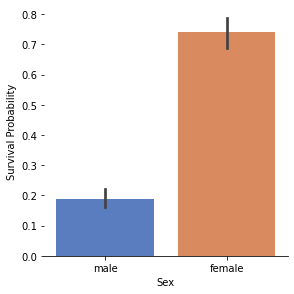

In [44]:
g = sns.factorplot(x="Sex", y="Survived",  data=train_data,
                   size=4, kind="bar", palette="muted")
g.despine(left=True)
g = g.set_ylabels("Survival Probability")


c.结论：从图上可以明显看出，女性的存活率远高于男性

d.处理：离散化处理

In [45]:
def sexfun(s):
    if s=='male':
        return 1
    else:
        return 0

train_data.Sex = train_data.Sex.apply(sexfun)

##### 3.1.2 Pclass

a.查看不同舱位等级的存活率

In [46]:
train_data[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


b.绘制不同舱位存活率的图像

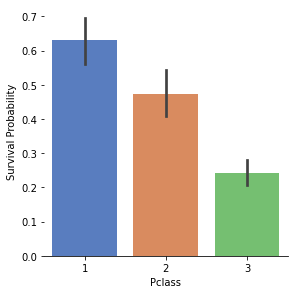

In [47]:
g = sns.factorplot(x="Pclass", y="Survived",  data=train_data,
                   size=4, kind="bar", palette="muted")
g.despine(left=True)
g = g.set_ylabels("Survival Probability")

c.结论：舱位等级越高，存活率越高

##### 3.1.3 Embarked

a.查看不同地点处登船的存活率

In [48]:
train_data[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


b.绘制出不同地点登船的存活率图像

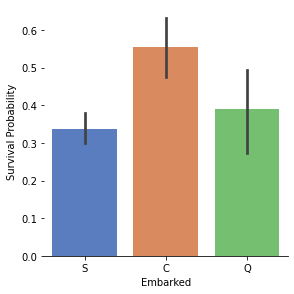

In [49]:
g = sns.factorplot(x="Embarked", y="Survived",  data=train_data,
                   size=4, kind="bar", palette="muted")
g.despine(left=True)
g = g.set_ylabels("Survival Probability")

c.结论：从C处登船存活率最高，S和Q两处存活率相差不大

#### 3.2 连续变量

##### 3.2.1 Age

##### 3.2.2fare

#### 3.3 离散变量

##### 3.3.1 Sibsp

a.查看不同兄弟姐妹人数在船上的存活率

In [50]:
train_data[["SibSp", "Survived"]].groupby(['SibSp'],as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


b.绘制不同兄弟姐妹在船上人数的存活率图像

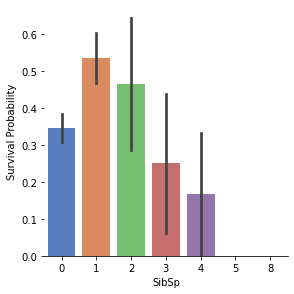

In [51]:
g = sns.factorplot(x="SibSp", y="Survived",  data=train_data,
                   size=4, kind="bar", palette="muted")
g.despine(left=True)
g = g.set_ylabels("Survival Probability")

c.结论：船上兄弟姐妹或配偶人数越多，存活率越低

d.处理：

##### 3.3.2 Parch

a.查看乘客父母孩子在船上的不同人数的存活率

In [52]:
train_data[["Parch", "Survived"]].groupby(['Parch'],\
as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


b.绘制出乘客父母孩子在船上的人数的存活率图像

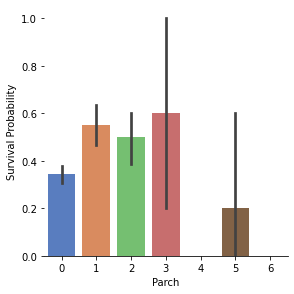

In [53]:
g = sns.factorplot(x="Parch", y="Survived",  data=train_data,
                   size=4, kind="bar", palette="muted")
g.despine(left=True)
g = g.set_ylabels("Survival Probability")

#### 3.4 其他变量

##### 3.4.1 Name

我们认为乘客的姓名对是否存活无影响，所以将改列的数据删除。

In [54]:
train_data.drop(labels=['Name'],inplace=True,axis=1)

##### 3.4.2 Passengered

 PassengerId 列对分析并没有实际意义，所以删除该列

In [55]:
train_data.drop(labels=['PassengerId'],inplace=True,axis=1)

##### 3.4.3 Cabin

In [61]:
train_data.info()
train_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,1,22.0,1,0,A/5 21171,7.2500,S
1,1,1,0,38.0,1,0,PC 17599,71.2833,C
2,1,3,0,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,0,35.0,1,0,113803,53.1000,S
4,0,3,1,35.0,0,0,373450,8.0500,S


从上面可以看出，Cabin 列的缺失值过多，因此将 Cabin 列进行删除操做。

In [62]:
train_data.drop(labels='Cabin',inplace=True,axis=1)

KeyError: "['Cabin'] not found in axis"

##### 3.4.4 Ticket

Ticket 十分杂乱，我们选择剔除

In [65]:
train_data.drop(labels=['Ticket'],inplace=True,axis=1)

KeyError: "['Ticket'] not found in axis"

In [66]:

train_data.columns
train_data.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,0.477990,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200


### 缺失值处理

In [4]:
train_data.info()
train_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     204 non-null    object 
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


由上面可以看出 Age、Cabin、Embarked 列有的缺失值，且Cabin 列的缺失值过多，因此将 Cabin 列进行删除操做。

之后对 int 类型的 Age 列的缺失值以其平均值填充，对 object 类型的 Embarked 列的缺失值以其众数填充。

In [41]:
train_data.drop(labels='Cabin',inplace=True,axis=1)
train_data['Age']=train_data['Age'].fillna(29.70) # 29.70 为 Age 列的均值。
train_data['Embarked']=train_data['Embarked'].fillna(train_data.Embarked.mean)
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


### 数据标准和归一化

因为 sex、Embarked 列的数据为字符串类型，所以需要将其离散化处理，使其方便于模型训练。

In [42]:
def sexfun(s):
    if s=='male':
        return 1
    else:
        return 0

train_data.Sex = train_data.Sex.apply(sexfun)

def EmbarkedFun(s):
    if s=='S':
        return 0
    elif s=='C':
        return 1
    else:
        return 2

train_data.Embarked=train_data.Embarked.apply(EmbarkedFun)

train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 55.8 KB


归一化：
- 把数据变成(０，１)或者（1,1）之间的小数。主要是为了数据处理方便提出来的，把数据映射到0～1范围之内处理，更加便捷快速。
- 把有量纲表达式变成无量纲表达式，便于不同单位或量级的指标能够进行比较和加权。归一化是一种简化计算的方式，即将有量纲的表达式，经过变换，化为无量纲的表达式，成为纯量。

这步，我们将 Fare 列和 Age 列的数据进行归一化处理，使它更适合训练模型。

In [43]:
min_max_scaler = preprocessing.MinMaxScaler()
train_data[['Fare','Age']]=min_max_scaler.fit_transform(train_data[['Fare','Age']])

In [44]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,0.271174,1,0,0.014151,0
1,1,1,0,0.472229,1,0,0.139136,1
2,1,3,0,0.321438,0,0,0.015469,0
3,1,1,0,0.434531,1,0,0.103644,0
4,0,3,1,0.434531,0,0,0.015713,0


## 模型训练

划分训练集和测试集

In [45]:
X_train, X_test, y_train, y_test = train_test_split(train_data.iloc[:,1:], train_data['Survived'], test_size=0.3, random_state=42)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 623 entries, 445 to 102
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    623 non-null    int64  
 1   Sex       623 non-null    int64  
 2   Age       623 non-null    float64
 3   SibSp     623 non-null    int64  
 4   Parch     623 non-null    int64  
 5   Fare      623 non-null    float64
 6   Embarked  623 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 38.9 KB
